# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Dataset

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

| Variable | Definition                                 | Key                                                                                                                                                                                             |
|----------|--------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                                                                                                                                                                 |
| pclass   | Ticket class                               | 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)                                                                                                                                                 |
| sex      | Sex                                        |                                                                                                                                                                                                 |
| Age      | Age in years                               | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                                                                            |
| sibsp    | # of siblings / spouses aboard the Titanic | The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)                             |
| parch    | # of parents / children aboard the Titanic | The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                                                                                                                                                                 |
| fare     | Passenger fare                             |                                                                                                                                                                                                 |
| cabin    | Cabin number                               |                                                                                                                                                                                                 |
| embarked | Port of Embarkation	                        | C = Cherbourg, Q = Queenstown, S = Southampton                                                                                                                                                  |

## Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(200)
df['Embarked'] = df['Embarked'].fillna('N/A')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [9]:
# Encodes string/object values to integers (eg: sex-male/female into 0/1)

# Must use same label_encoder
label_encoder = preprocessing.LabelEncoder()

def label_encode(dataset, column):
    dataset_copy = dataset.copy()
    dataset_copy[column] = label_encoder.fit_transform(dataset[column])
    return dataset_copy

In [10]:
df = label_encode(df, 'Pclass')
df = label_encode(df, 'Sex')
df = label_encode(df, 'Embarked')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

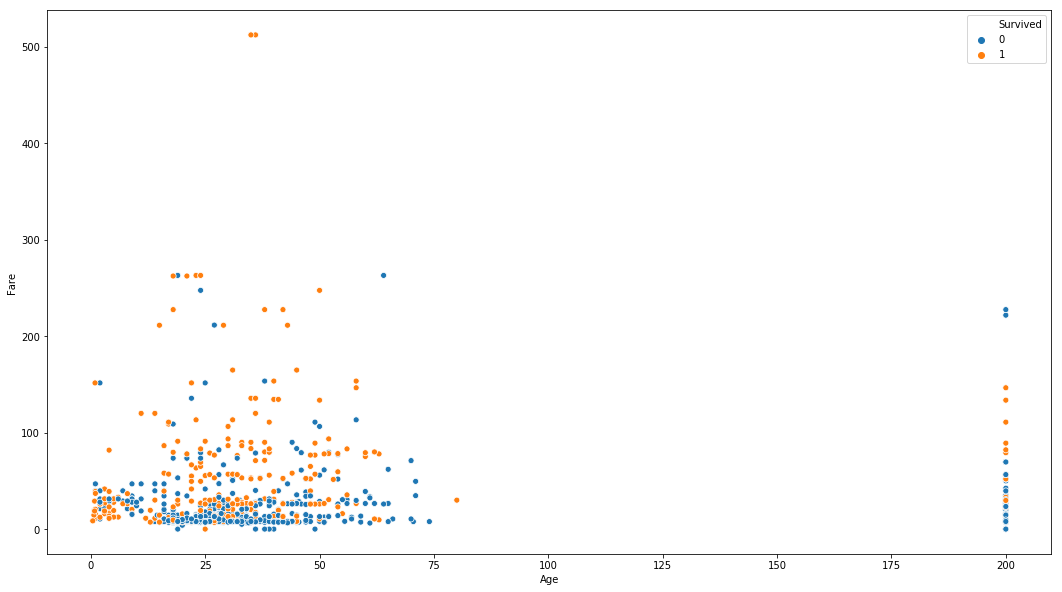

In [11]:
plt.figure(figsize=(18,10))
sns.scatterplot(x="Age", y='Fare', hue="Survived", data=df)

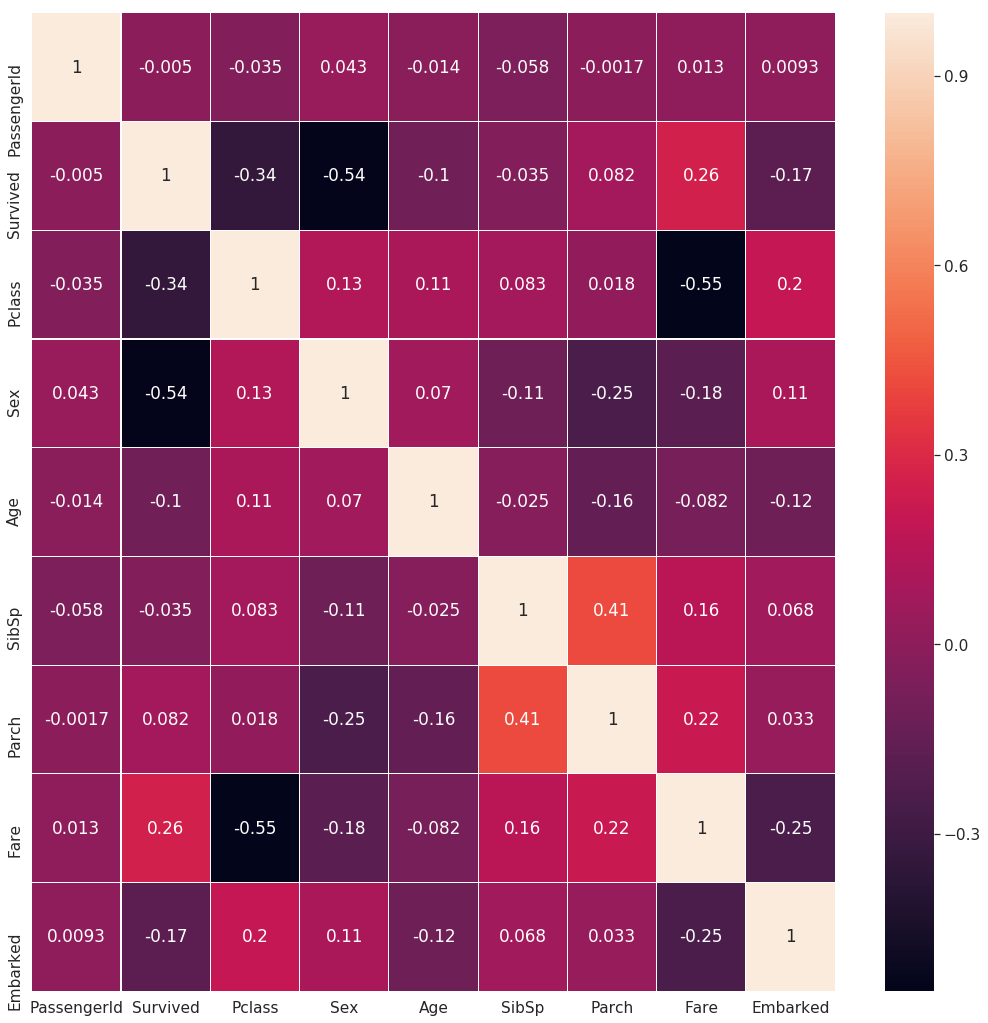

In [12]:
# Draw heat map. Light colors mean correlation is high.
plt.figure(figsize=(18,18))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2,1,22.0,1,0,7.2500,3
1,2,1,0,0,38.0,1,0,71.2833,0
2,3,1,2,0,26.0,0,0,7.9250,3
3,4,1,0,0,35.0,1,0,53.1000,3
4,5,0,2,1,35.0,0,0,8.0500,3


In [15]:
from sklearn import model_selection, metrics, preprocessing

In [16]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split( # Test and train data split builtin function
    df.drop('Survived', 1), # Input Data: dataset without target series(dropped target series from axis 1)
    df['Survived'], # Output Data: target series
    test_size = .1, # How much to be given to test dataset
    random_state=10 # Seed used to shuffle
)
X_train = X_train.drop('PassengerId', 1)
X_test = X_test.drop('PassengerId', 1)

In [17]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
429,2,1,32.0,0,0,8.0500,3
629,2,1,200.0,0,0,7.7333,2
351,0,1,200.0,0,0,35.0000,3
45,2,1,200.0,0,0,8.0500,3
577,0,0,39.0,1,0,55.9000,3


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def test_classifiers(X_train, X_test, y_train, y_test):
    classifiers=[['Logistic Regression',LogisticRegression()],
           ['Decision Tree Classification',DecisionTreeClassifier()],
           ['Gradient Boosting Classification', GradientBoostingClassifier()],
           ['Ada Boosting Classification',AdaBoostClassifier()],
           ['Extra Tree Classification', ExtraTreesClassifier()],
           ['K-Neighbors Classification',KNeighborsClassifier()],
           ['Support Vector Classification',SVC()],
           ['Gaussian Naive Bayes',GaussianNB()]]
    cla_pred = {'method': [], 'accuracy': []}
    for name, model in classifiers:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        cla_pred['method'].append(name)
        cla_pred['accuracy'].append(accuracy*100)
        
    return pd.DataFrame(cla_pred)

In [19]:
test_classifiers(X_train, X_test, y_train, y_test)

/home/sunera/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sunera/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sunera/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,method,accuracy
0,Logistic Regression,81.111111
1,Decision Tree Classification,76.666667
2,Gradient Boosting Classification,86.666667
3,Ada Boosting Classification,81.111111
4,Extra Tree Classification,77.777778
5,K-Neighbors Classification,72.222222
6,Support Vector Classification,73.333333
7,Gaussian Naive Bayes,80.000000


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8555555555555555


---

In [37]:
df_t = pd.read_csv('test.csv')

df_t = df_t.drop('Name', axis=1)
df_t = df_t.drop('Ticket', axis=1)
df_t = df_t.drop('Cabin', axis=1)

df_t['Age'] = df_t['Age'].fillna(200)
df_t['Embarked'] = df_t['Embarked'].fillna('N/A')
df_t['Fare'] = df_t['Fare'].fillna(df_t['Fare'].mean())

df_t = label_encode(df_t, 'Pclass')
df_t = label_encode(df_t, 'Sex')
df_t = label_encode(df_t, 'Embarked')

problems = df_t.drop('PassengerId', 1)
problems.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
problems.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2


In [39]:
predictions = model.predict(problems)
predictions = pd.DataFrame({'Survived': predictions})

In [40]:
ids = pd.DataFrame({'PassengerId': df_t['PassengerId']})
ids.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [41]:
merged = pd.merge(ids, predictions, left_index=True, right_index=True)
merged.head()

merged.to_csv('predictions.csv', index=False)

---

In [35]:
df_e = pd.read_csv('gender_submission.csv')
df_e.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
